In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df=sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.name.nunique()

305

In [6]:
# kullanmayacagimiz categorik name sutunu drop yapiliyor
df.drop(["name"], axis=1, inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
# Null degerler drop yapilir.
df.dropna(inplace=True)

In [9]:
# herhangi null varmi tekrar kontrol edilir
df.isnull().sum().any()

False

In [10]:
df.shape

(392, 8)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


> 'model_year' bu haliyle isimize yaramaz, onu 'age' halinede donusturup yeni sutun yapariz

In [12]:
from datetime import datetime

In [13]:
today=datetime.today()
this_year=today.year
this_year

2020

In [14]:
df["age"]=this_year - (1900 + df.model_year)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [15]:
df.drop(["model_year"], axis=1, inplace=True)

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    object 
 7   age           392 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


> modele yalniz float ve integer degerleri sokabiliriz, dolayisiyla 'origin' sutununu numerik degere donusturmeliyiz

In [18]:
df2=df.copy()
df2=pd.get_dummies(df2)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,0,1


> [origin_europe, origin_japan, origin_usa] icinden birini silmezsek dummy trap olur. 1 tanesi gereksizdir.

> evaluation metriclerinin farkini gormek icin df2 tanimladik, df ve df2 farkini gorecegiz. df2 de dummy trap olur.

In [19]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,1


# Training a Linear Regression Model

In [20]:
X=df.drop(["mpg"], axis=1)
y=df["mpg"]

In [21]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1


In [22]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
# r2 score: veriyi yüzdelik oranda temsil etme kabiliyeti
print(model.score(X,y)*100)

82.0950993404808


# Model Evaluate

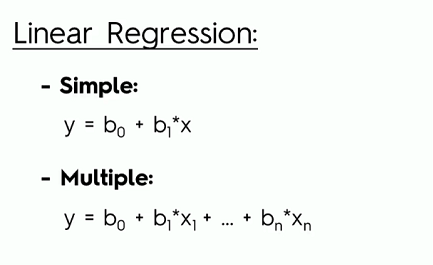

In [29]:
# bo =interception
model.intercept_

78.98744579652973

In [30]:
# Coefficients= b1,b2,...,bn
model.coef_

array([-0.33310348,  0.02043511, -0.0287697 , -0.00632182,  0.04129408,
       -0.77819537,  0.0253158 , -3.33687764])

In [31]:
# coefficientlari daha iyi gostermek icin DF yapiyoruz
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
cylinders,-0.333103
displacement,0.020435
horsepower,-0.028770
weight,-0.006322
acceleration,0.041294
age,-0.778195
origin_japan,0.025316
origin_usa,-3.336878


# Prediction

In [32]:
y_pred = model.predict(X_test)
y_pred

array([27.18313465, 27.1137765 , 34.42749367, 24.51965856, 28.1397483 ,
       30.31792039,  8.62951145, 30.47504439, 20.52420346, 30.06210953,
       12.59139672, 24.97140612, 16.82484156, 29.42205819, 22.90419684,
       28.84473973, 20.23904278, 33.21744527, 26.3233558 , 31.30754596,
       18.78553805, 36.12013685, 35.34586703, 14.953345  , 29.77516512,
       26.81434277, 22.22342237, 15.99675866, 30.27826644, 25.45699696,
       13.45684638, 23.53661524, 20.76892542, 31.75165735, 12.54405065,
       36.09787267, 10.67248113, 23.9174239 , 11.29079807,  6.65002263,
       12.83716005, 28.85312918, 36.21492323, 27.65478144, 11.99848941,
        9.73691626, 17.62336429, 32.76504392, 24.15900237, 31.58071812,
       11.92173725, 26.14195764, 22.78567079, 34.97302622, 28.28391249,
       17.74497792, 20.35115337, 22.73603938, 23.84570627, 25.61791238,
        8.39023181, 22.78697021, 25.43646287, 24.56508375, 29.71308886,
       30.11798192, 25.40369633, 30.79426393, 21.81711467, 10.11

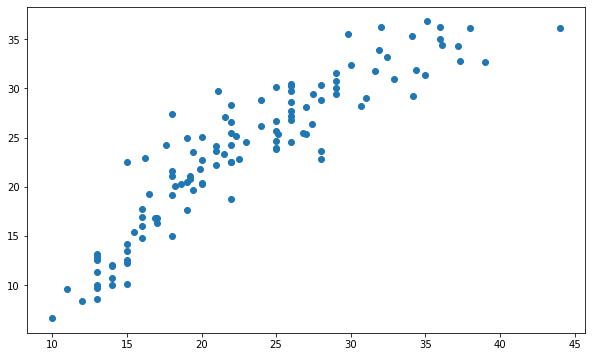

In [33]:
fig=plt.subplots(figsize=(10,6))
plt.scatter(y_test,y_pred);

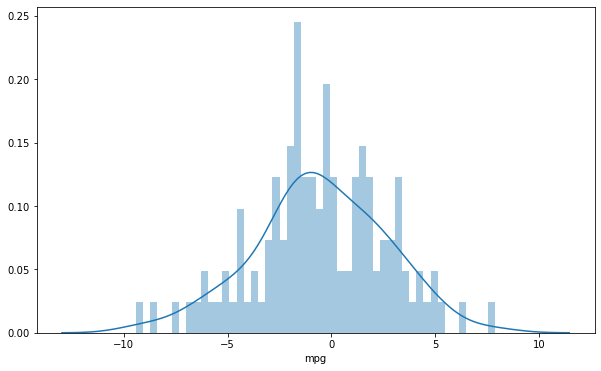

In [34]:
fig=plt.subplots(figsize=(10,6))
sns.distplot((y_test-y_pred), bins=50);

In [35]:
y_pred_train=model.predict(X_train)

# Evaluation Metrics

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [38]:
eval_metrics(y_test, y_pred)

R2 Score: 0.8044759002829678
Mean Absolute Error(MAE): 2.5344897258611074
Mean Square Error(MSE): 10.344169215429307
Root Mean Square Error(RMSE): 3.216235254988246


In [39]:
eval_metrics(y_train, y_pred_train)

R2 Score: 0.8264725052859168
Mean Absolute Error(MAE): 2.561115417319287
Mean Square Error(MSE): 11.110055296972938
Root Mean Square Error(RMSE): 3.3331749574501695


# Comparison of Actual and Predictions

In [40]:
my_dict={"Actual":y_test, "Predictions":y_pred}
compare=pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Predictions
344,39.0,32.708495
0,18.0,14.953345
255,25.1,25.403696
73,13.0,12.837160
157,15.0,13.456846
34,16.0,15.996759
257,19.4,23.536615
125,20.0,20.239043
18,27.0,25.354329
47,19.0,17.623364


# Distribution of Residuals

In [41]:
# pip install yellowbrick

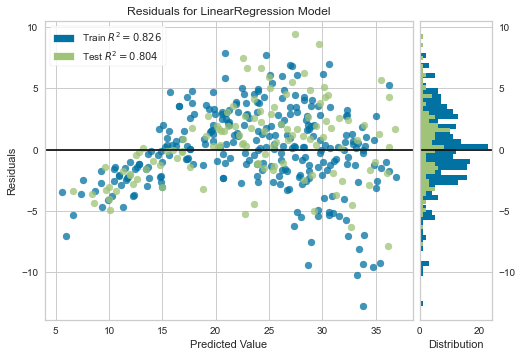

In [42]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

# Residuals: Actual ve Prediction arasindaki hata payi, gercek degerden sasmayi ifade eder.

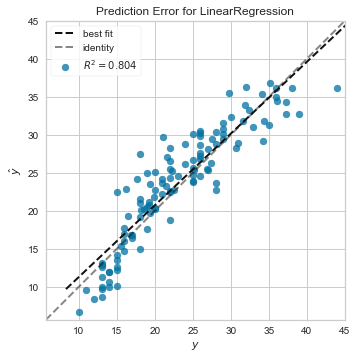

In [43]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

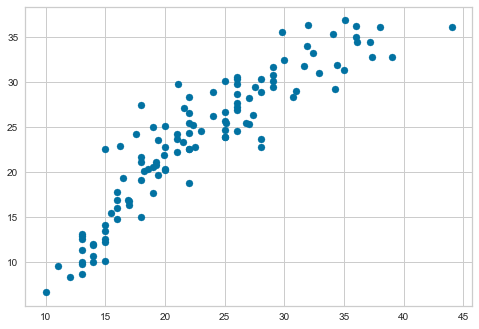

In [44]:
plt.scatter(y_test, y_pred);